### 🧠 셀 1 설명
`pandas`, `matplotlib`, `os`, `LabelEncoder`, `SMOTE` 등의 주요 라이브러리를 불러옵니다.

또한 작업 경로를 확인하고, 데이터를 불러올 준비를 합니다.

분석 모델 - 랜덤 포레스트
분류와 회귀에 사용되는 지도 학습 알고리즘. 여러 개의 의사결정나무를 조합한 모델. 


### 🧠 셀 2 설명
`accident_data_filtered.csv` 데이터를 불러오고, 상위 몇 개 행을 출력하여 데이터 구조를 확인합니다.

In [1]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
# # os.chdir("/Users/leejuan/Documents/GitHub/senior-road-risk-analyzer")
print("✅ 작업 경로 변경 완료:", os.getcwd())
# 데이터 불러오기
df = pd.read_csv("./data/processed/accident_data_filtered.csv")
df.head()

ModuleNotFoundError: No module named 'imblearn'

### 🧠 셀 3 설명
고령자 사고 여부(`is_elderly_accident`) 파생변수를 생성합니다. 만 65세 이상이면 1, 그렇지 않으면 0으로 구분합니다.

In [2]:
print(df.columns)
print(df.dtypes)

Index(['acdnt_year', 'occrrnc_time_code', 'legaldong_name', 'acdnt_hdc',
       'lrg_violt_1_dc', 'road_stle_dc', 'wrngdo_vhcle_asort_dc',
       'acdnt_age_1_code', 'rdse_sttus_dc', 'road_div', 'lat', 'lng',
       'near_crosswalk', 'near_traffic_light', 'near_child_zone',
       'near_elderly_zone', 'near_disabled_zone', 'lanes', 'lengths',
       'velocity', 'traffic_volume', 'elderly_hotspot', 'non_elderly_hotspot',
       'all_hotspot'],
      dtype='object')
acdnt_year                 int64
occrrnc_time_code          int64
legaldong_name            object
acdnt_hdc                 object
lrg_violt_1_dc            object
road_stle_dc              object
wrngdo_vhcle_asort_dc     object
acdnt_age_1_code           int64
rdse_sttus_dc             object
road_div                 float64
lat                      float64
lng                      float64
near_crosswalk             int64
near_traffic_light         int64
near_child_zone            int64
near_elderly_zone          int64
nea

### 🧠 셀 4 설명
사용할 도로 관련 변수들만 선택하여 `X`에 저장하고, 타겟 변수 `y`는 `is_elderly_accident`로 설정합니다.

In [3]:
# 수치형 결측치 처리
num_cols = ['lanes', 'lengths', 'velocity', 'traffic_volume']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)

### 🧠 셀 5 설명
범주형 변수를 라벨 인코딩하고, 결측치를 평균으로 채워줍니다.

In [4]:
#범주형 인코딩
cat_cols = ['acdnt_hdc', 'lrg_violt_1_dc', 'road_stle_dc', 'wrngdo_vhcle_asort_dc', 'rdse_sttus_dc', 'road_div']
for col in cat_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

### 🧠 셀 6 설명
`train_test_split`으로 학습용과 테스트용 데이터를 나눕니다.

In [5]:
# 이진형 정수 변환 (0 또는 1 처리)
bin_cols = [
    'near_crosswalk',         # 근접 횡단보도 여부
    'near_traffic_light',     # 근접 신호등 여부
    'near_child_zone',        # 근접 어린이 보호구역 여부
    'near_elderly_zone',      # 근접 고령자 보호구역 여부
    'near_disabled_zone'      # 근접 장애인 보호구역 여부
]
for col in bin_cols:
    df[col] = df[col].fillna(0).astype(int)

### 🧠 셀 7 설명
SMOTE로 학습 데이터를 오버샘플링하여 클래스 불균형 문제를 완화합니다.

In [6]:
df["acdnt_age_1_code"] = pd.to_numeric(df["acdnt_age_1_code"], errors="coerce")  # 나이 숫자로 변환
df = df[df["acdnt_age_1_code"].notna()]  # 결측치 제거
df = df[(df["acdnt_age_1_code"] >= 18) & (df["acdnt_age_1_code"] <= 99)]  # 18~99세 필터링
df["is_elderly_accident"] = df["acdnt_age_1_code"].apply(lambda x: 1 if x >= 65 else 0)  # 고령자 사고 여부
df.to_csv("./data/processed/accident_data_cleaned.csv", index=False)

/home/sandbox/.local/lib/python3.11/site-packages/pandas/core/internals/blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


### 🧠 셀 8 설명
랜덤포레스트 모델을 정의하고, 오버샘플링된 학습 데이터로 학습합니다.

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.88     15073
           1       0.24      0.05      0.08      3442

    accuracy                           0.79     18515
   macro avg       0.53      0.51      0.48     18515
weighted avg       0.71      0.79      0.73     18515



findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     60274
           1       0.96      0.99      0.98     13784

    accuracy                           0.99     74058
   macro avg       0.98      0.99      0.99     74058
weighted avg       0.99      0.99      0.99     74058



findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


/tmp/ipykernel_656/2315322111.py:53: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656/2315322111.py:53: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656/2315322111.py:53: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656/2315322111.py:53: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656/2315322111.py:53: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656/2315322111.py:53: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656/2315322111.py:53: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_656/2315322111.py:53: UserWarni

findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


/home/sandbox/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sandbox/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sandbox/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sandbox/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sandbox/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io

findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


findfont: Font family 'AppleGothic' not found.


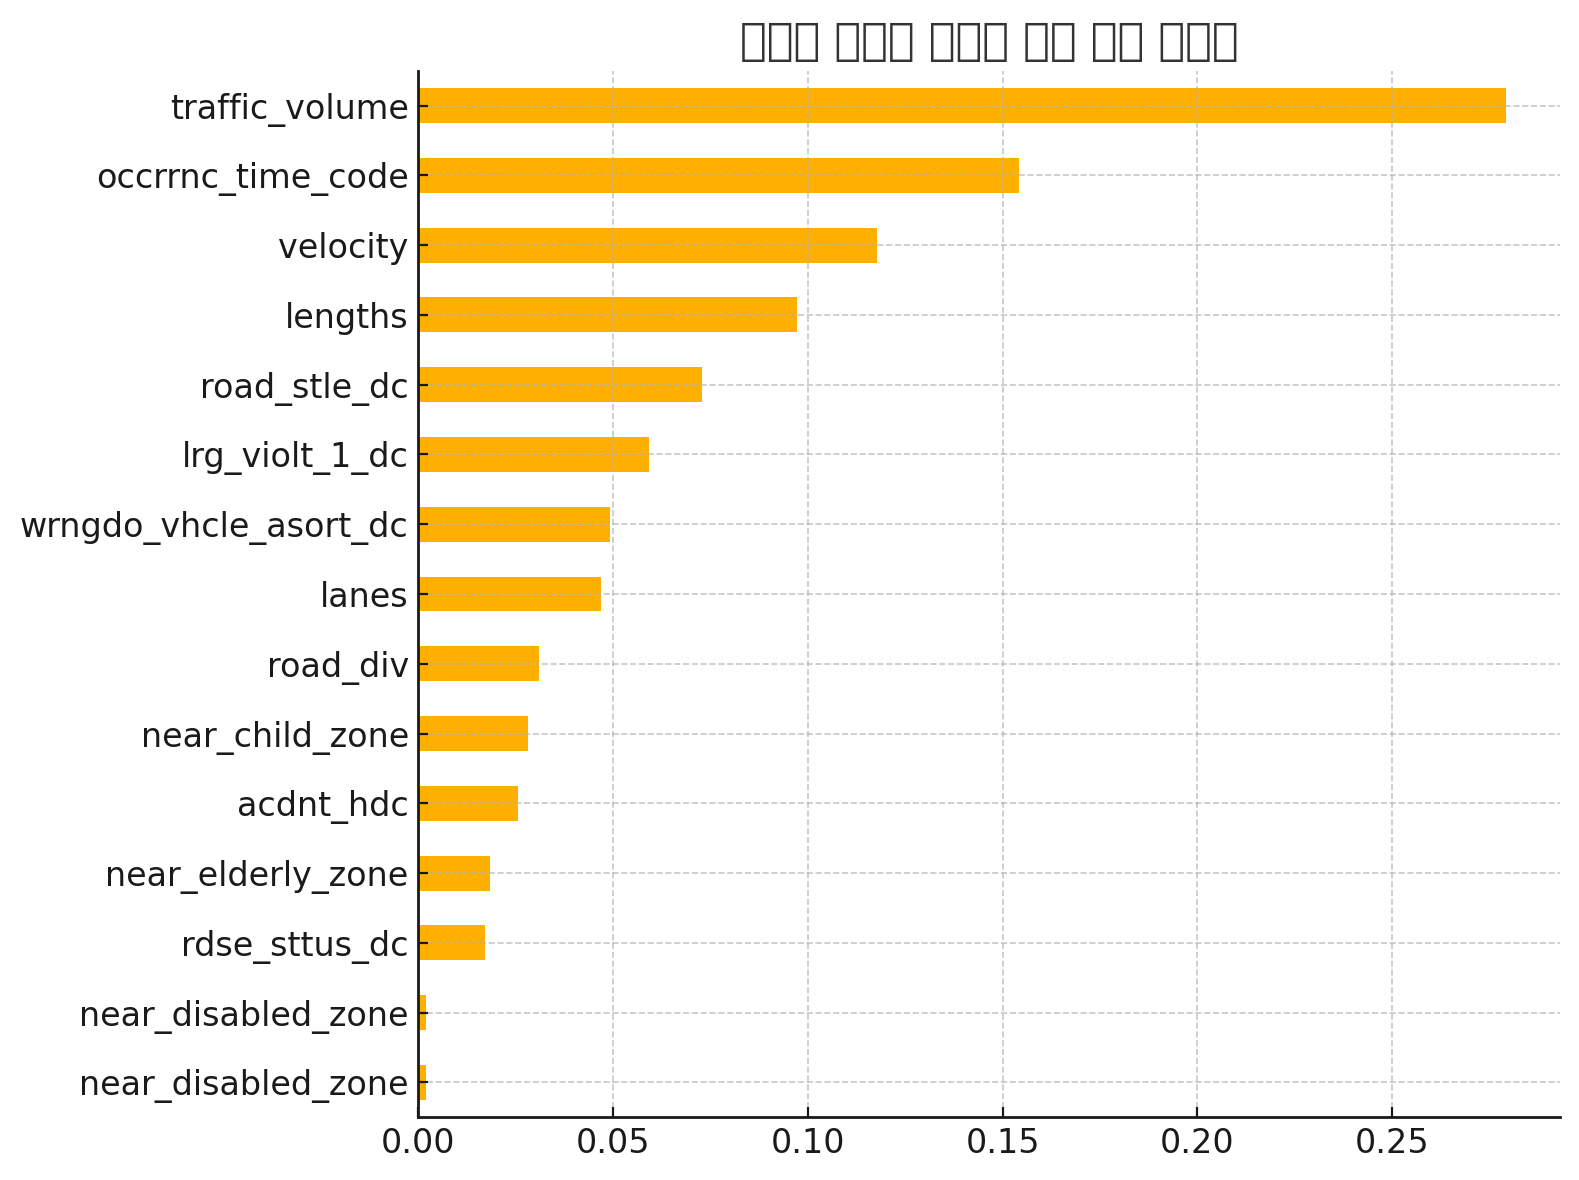

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import PartialDependenceDisplay
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# macOS일 경우 기본 애플 시스템 폰트
plt.rcParams['font.family'] = 'AppleGothic'

# 혹시 마이너스 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False
# 데이터 로드
df = pd.read_csv('./data/processed/accident_data_cleaned.csv')
# 타겟 변수
df["is_elderly_accident"] = df["acdnt_age_1_code"].apply(lambda x: 1 if x >= 65 else 0)
y = df["is_elderly_accident"]
# 자전거 제외
df = df[df["wrngdo_vhcle_asort_dc"] != "자전거"]
# 독립변수 설정
features = [
    'occrrnc_time_code', 'acdnt_hdc', 'lrg_violt_1_dc', 'road_stle_dc',
    'wrngdo_vhcle_asort_dc', 'rdse_sttus_dc', 'road_div',
    'near_disabled_zone', 'near_child_zone', 'near_elderly_zone', 'near_disabled_zone',
    'lanes', 'lengths', 'velocity', 'traffic_volume'
]
X = df[features].copy()

# 범주형 라벨 인코딩
label_cols = X.select_dtypes(include='object').columns
for col in label_cols:
    X[col] = X[col].astype(str)  # 문자열로 통일
    X[col] = LabelEncoder().fit_transform(X[col])

# 학습 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 모델 학습
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
#예측
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(classification_report(y_train, model.predict(X_train)))

# 변수 중요도 시각화
importances = model.feature_importances_
pd.Series(importances, index=features).sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('고령자 사고에 영향을 주는 변수 중요도')
plt.tight_layout()
plt.show()
#교통량, 사고 시간대가 가장 큰 영향을 미친다.
#평균 속도, 가해 차량종류, 도로 길이도 형향을 미친다. => 테스트 

### 🧠 셀 9 설명
테스트셋과 학습셋에 대해 예측을 수행하고, 분류 리포트를 출력하여 성능을 평가합니다.

In [8]:

# 데이터 분할 (학습/테스트용 분리)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE :", pd.Series(y_train_resampled).value_counts().to_dict())

# 모델 학습
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 테스트셋 평가
y_pred = model.predict(X_test)
print("\n📊 SMOTE 적용 후 테스트셋 성능:")
print(classification_report(y_test, y_pred))

NameError: name 'SMOTE' is not defined

### 🧠 셀 10 설명
변수 중요도를 계산하고 시각화합니다. 고령자 사고 예측에 영향을 주는 주요 도로 요소를 파악할 수 있습니다.

In [137]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# 모델 정의
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Stratified K-Fold (클래스 비율 유지)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1-score 기준으로 평가 (고령자 사고 예측 정확성 중심)
scores = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(f1_score))

print("각 Fold의 F1-score:", scores)
print("평균 F1-score:", scores.mean())

각 Fold의 F1-score: [0.0875     0.08718563 0.08708134 0.07681229 0.08593937]
평균 F1-score: 0.08490372468508181


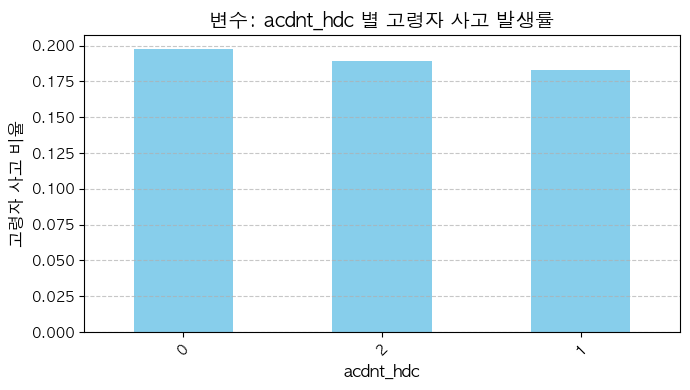

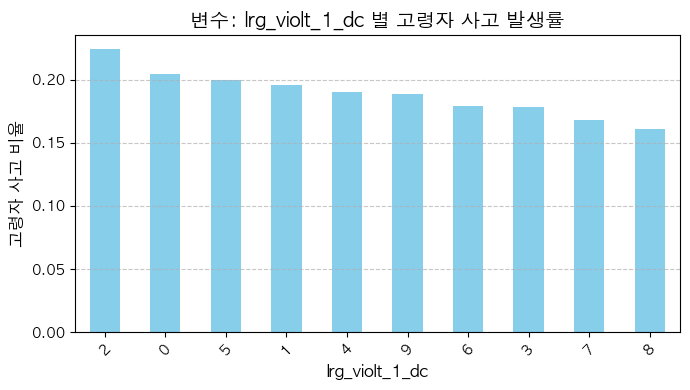

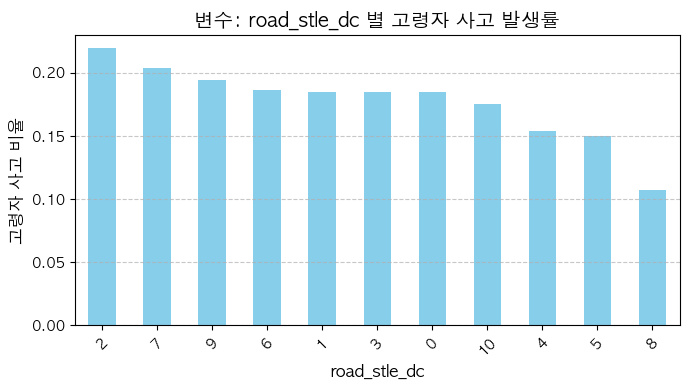

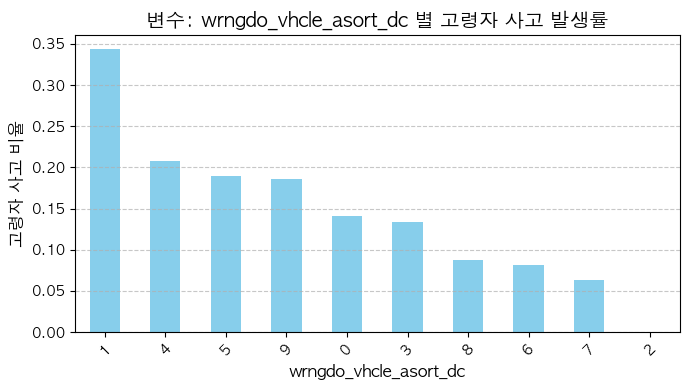

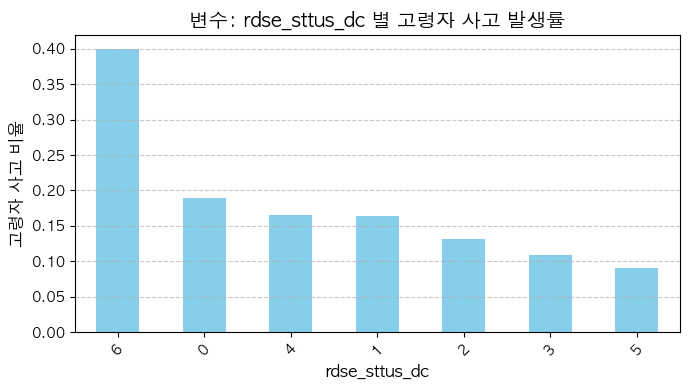

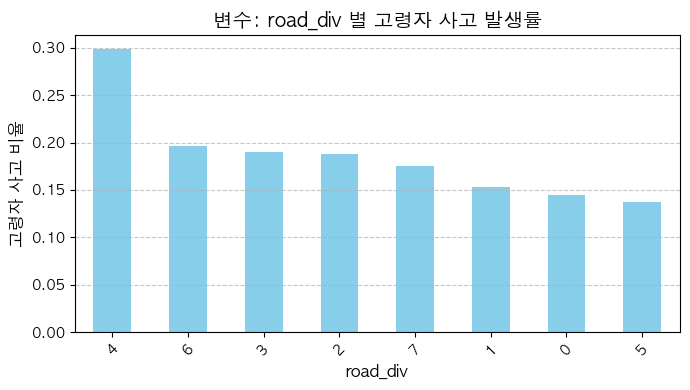

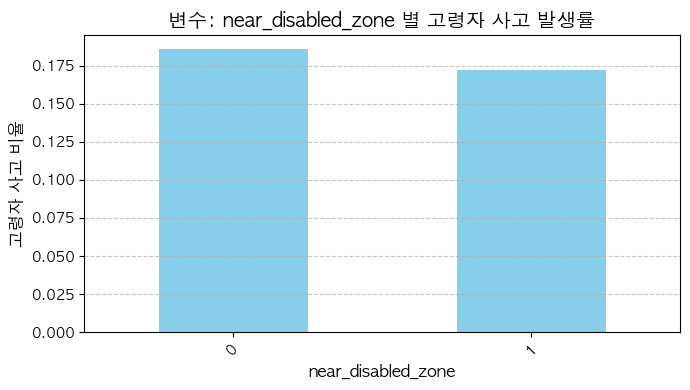

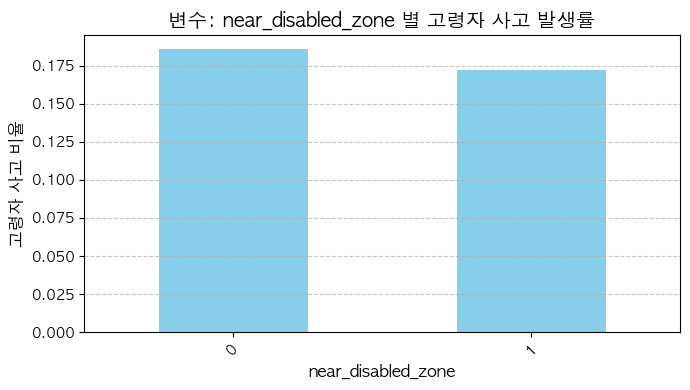

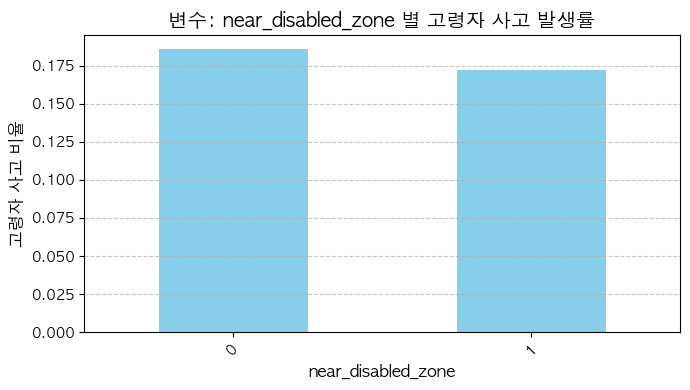

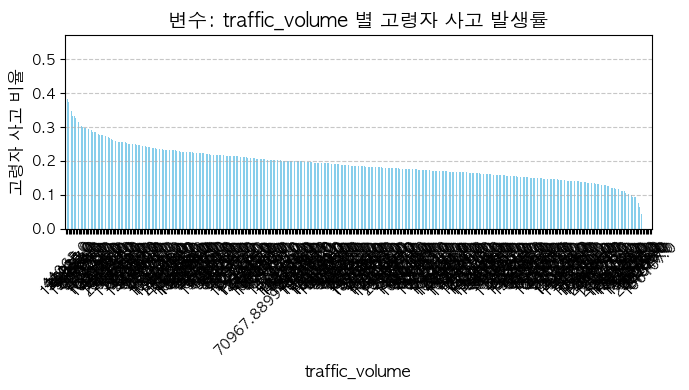

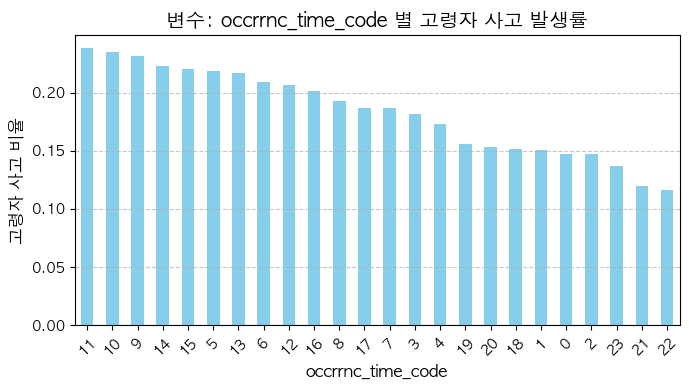

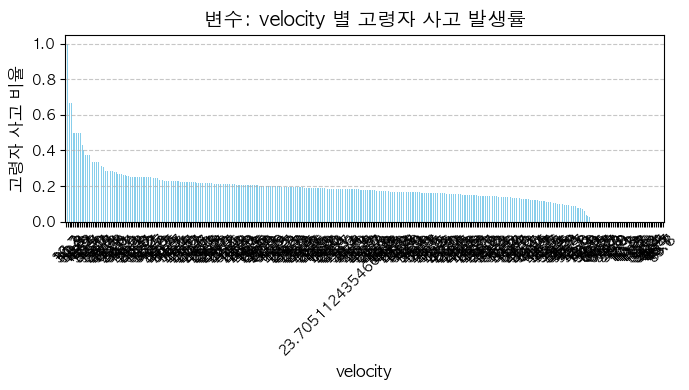

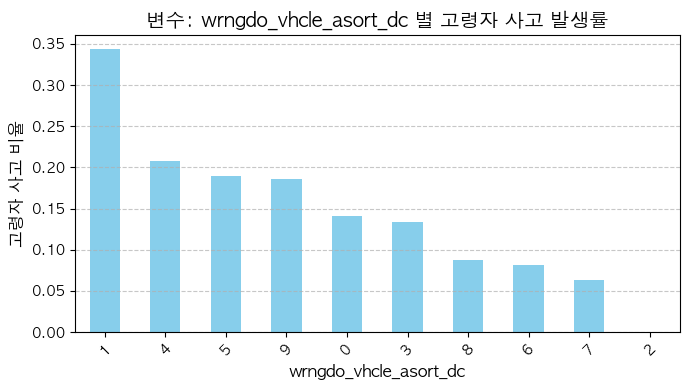

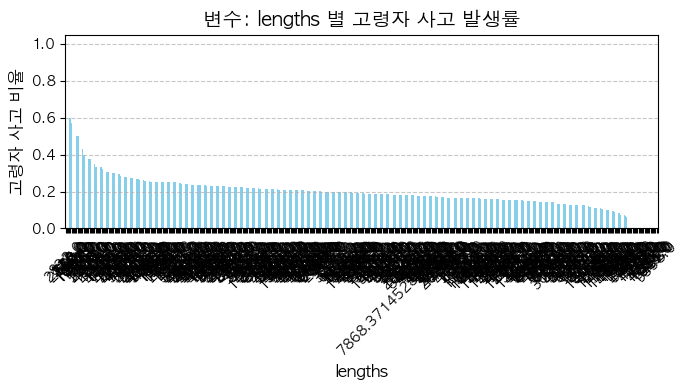

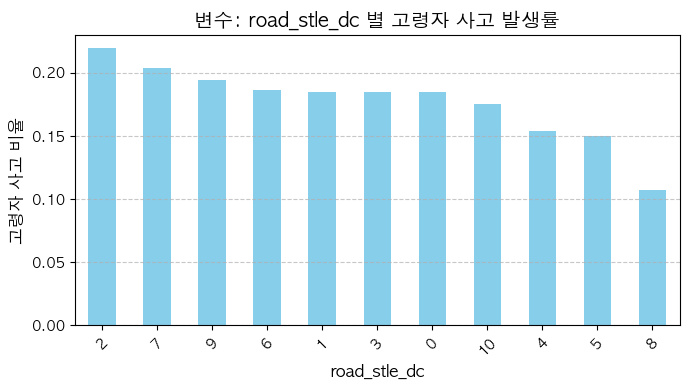

In [147]:

# 1. 데이터 불러오기
df = pd.read_csv('./data/processed/accident_data_cleaned.csv')  # 파일 경로 확인 필요

# 2. 고령자 사고 여부 컬럼 생성
df["acdnt_age_1_code"] = pd.to_numeric(df["acdnt_age_1_code"], errors="coerce")
df = df[df["acdnt_age_1_code"].notna()]
df["is_elderly_accident"] = df["acdnt_age_1_code"].apply(lambda x: 1 if x >= 65 else 0)

# 3. 분석할 범주형 변수 리스트
feature_list = [
    'acdnt_hdc',                 # 사고 유형
    'lrg_violt_1_dc',            # 법규 위반
    'road_stle_dc',              # 도로 형태
    'wrngdo_vhcle_asort_dc',     # 가해 차량 종류
    'rdse_sttus_dc',             # 노면 상태
    'road_div',                  # 도로 구분
    'near_disabled_zone',        # 장애인 보호구역 여부
    'near_disabled_zone',        # 장애인 보호구역 여부
    'near_disabled_zone',        # 장애인 보호구역 여부
    'traffic_volume',            # 교통량       
    'occrrnc_time_code',         # 사고 시간대  
    'velocity',                  # 차량속도  
    'wrngdo_vhcle_asort_dc',     # 가해 차량 종류  
    'lengths',                   # 사고 도로 길이  
    'road_stle_dc',              # 도로 형태  
]

# 4. 변수별 고령자 사고 발생률 시각화
for col in feature_list:
    plt.figure(figsize=(7, 4))
    
    # 각 값에 대해 고령자 사고율 평균 계산
    elderly_rate = df.groupby(col)["is_elderly_accident"].mean().sort_values(ascending=False)
    
    # 그래프 출력
    elderly_rate.plot(kind='bar', color='skyblue')
    plt.title(f"변수: {col} 별 고령자 사고 발생률", fontsize=14)
    plt.ylabel("고령자 사고 비율", fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

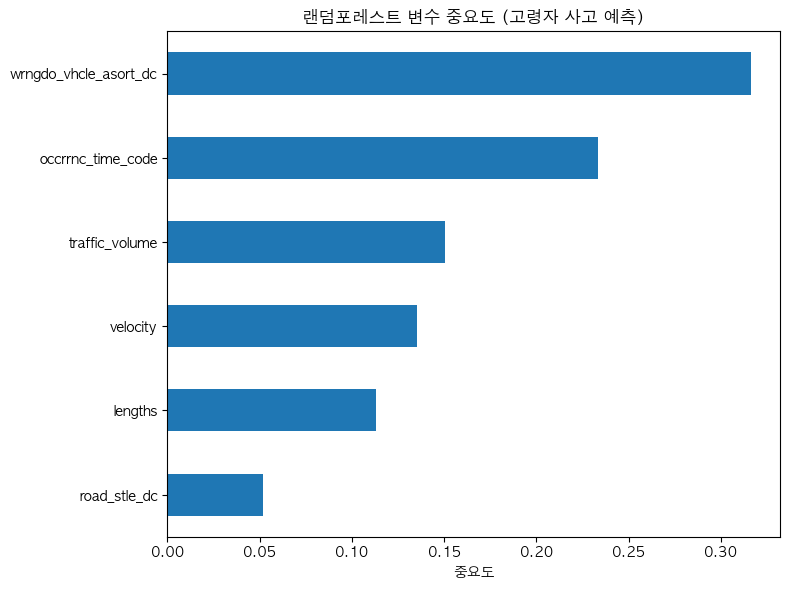

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.54      0.66     15073
           1       0.23      0.62      0.34      3442

    accuracy                           0.55     18515
   macro avg       0.55      0.58      0.50     18515
weighted avg       0.74      0.55      0.60     18515

              precision    recall  f1-score   support

           0       0.90      0.55      0.68     60274
           1       0.27      0.72      0.39     13784

    accuracy                           0.58     74058
   macro avg       0.58      0.64      0.54     74058
weighted avg       0.78      0.58      0.63     74058

Confusion Matrix:
[[8081 6992]
 [1323 2119]]
[[33030 27244]
 [ 3828  9956]]


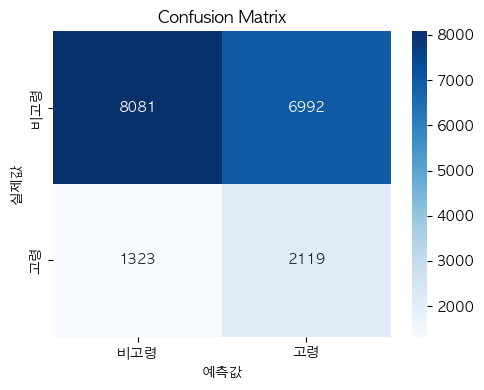

In [148]:
# 파일 경로
data_path = "./data/processed/accident_data_cleaned.csv"

# 데이터 불러오기
df = pd.read_csv(data_path)

# 고령자 사고 여부 생성
df["acdnt_age_1_code"] = pd.to_numeric(df["acdnt_age_1_code"], errors="coerce")
df = df[df["acdnt_age_1_code"].notna()]
df["is_elderly_accident"] = df["acdnt_age_1_code"].apply(lambda x: 1 if x >= 65 else 0)

# 변수 설정 (상위 6개)
selected_features = [
    'traffic_volume',
    'occrrnc_time_code',
    'velocity',
    'wrngdo_vhcle_asort_dc',
    'lengths',
    'road_stle_dc'
]
X = df[selected_features].copy()
y = df["is_elderly_accident"]

# 인코딩
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])
X = X.fillna(X.mean())

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# 변수 중요도 시각화 - 바로 출력
importances = pd.Series(model.feature_importances_, index=selected_features).sort_values()
plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title("랜덤포레스트 변수 중요도 (고령자 사고 예측)")
plt.xlabel("중요도")
plt.tight_layout()
plt.show()

# 예측 결과 출력
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(classification_report(y_train, model.predict(X_train)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_train, model.predict(X_train)))
# 혼동 행렬 시각화 - 바로 출력
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["비고령", "고령"], yticklabels=["비고령", "고령"])
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
#중요도상위 6개의 변수들을 놓고 다시 돌려 보았을 때, 가해 차량 종류와 사고 시간대가 가장 큰 영향을 미친다.

Partial Dependence Plot 시각화
다른변수 고정 후 하나의 변수가 바뀌었을 때 예측값 보여주느 그래프
랜덤포레스트 설명력 확보

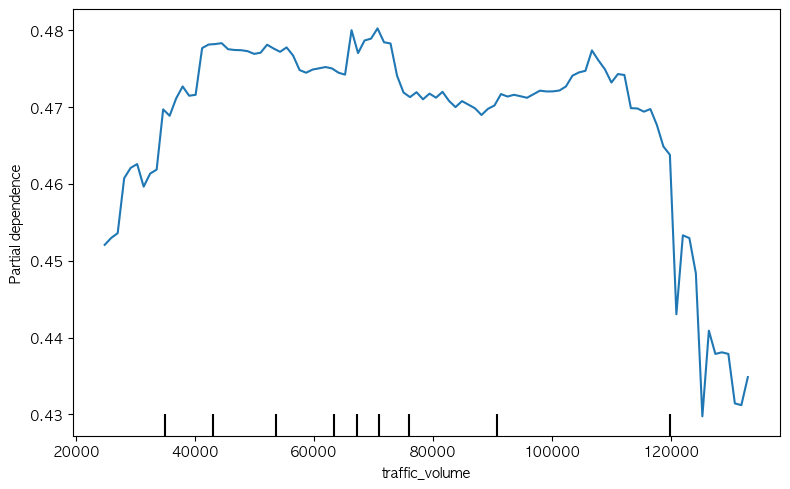

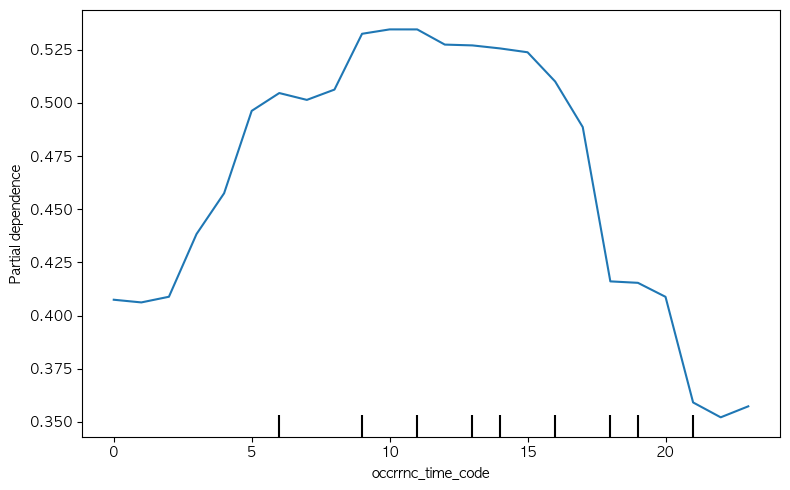

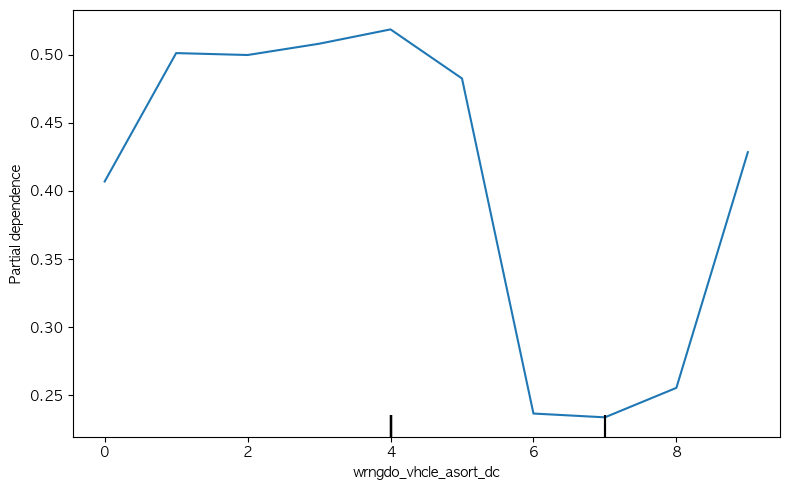

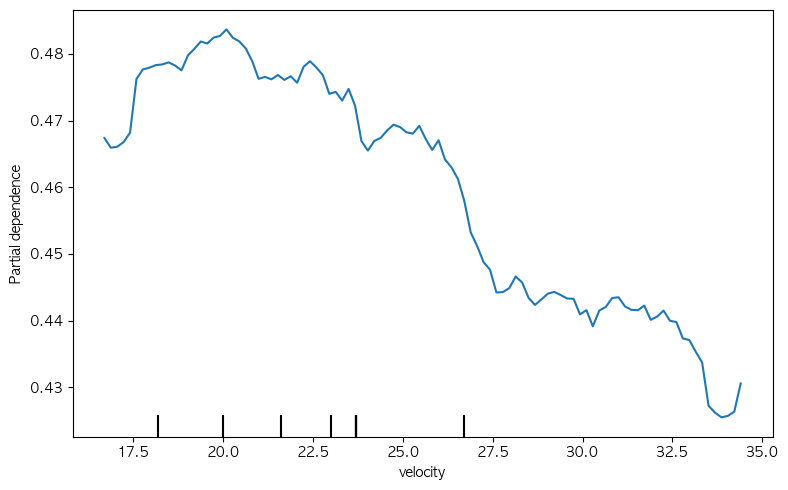

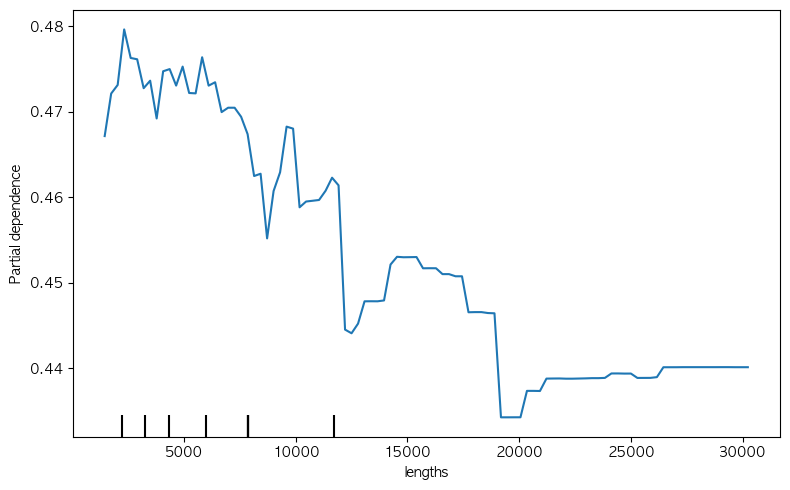

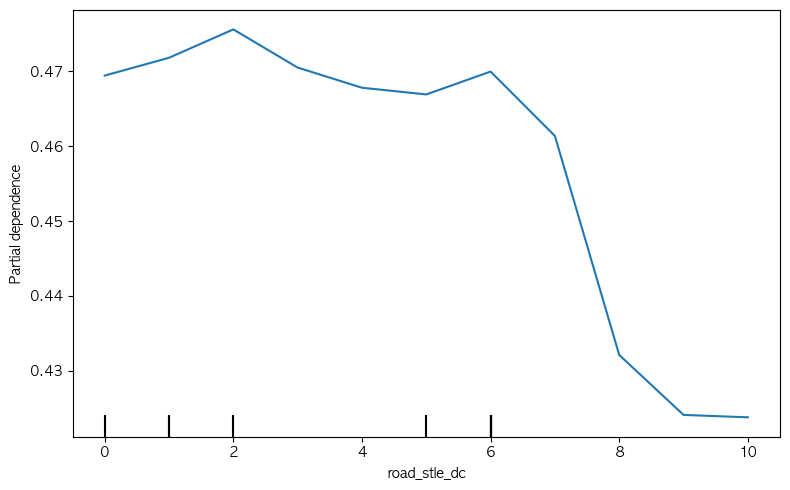

In [149]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Partial Dependence Plot 시각화
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, ['traffic_volume'], ax=ax)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, ['occrrnc_time_code'], ax=ax)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, ['wrngdo_vhcle_asort_dc'], ax=ax)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, ['velocity'], ax=ax)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, ['lengths'], ax=ax)
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(model, X_train, ['road_stle_dc'], ax=ax)
plt.tight_layout()
plt.show()





고툥량이 중간 정보일때 (약 6만~8만)고령자 사고 확률이 가장 높고 너무 많거나 적으면 사고확률은 낮아진다
중간 밀고에서 사고 위험이 상대적으로 높아진다
특정 시간대 (오전 10시~오후2시) 사고 확률이 상승 , 일부 늦은 시간대(야간)에는 사고 예측 확률 급감
고령자들은 주가 ㄴ활동 위주이기 때문에 낮 시간대에 집중되는 경향이 있다.
특정 차량 유형에서 고령자 사고 예측 확률이 확연히 높음 
이는 이륜차, 승합차, 화물차 등에서 두드러지게 나타남 
평균속도가 낮을수록 사고 확률 낮아짐. 중간 속도인 30~5-km/h에서 사고 확률이 높아짐
느린 속도는 사고 자체가 적고, 빠른 속도는 고령자와 마주칠 가능성지 적다. 중간 속도에서 보행자와 충돌위험이 있다.
짧은 도로 구간에서 사고 확률이 더 높음. 짧은 도로일 수록 교차로, 골목, 출입구가 많고 보행자와의 접촉 가능성이 높은 환경일 수 있다.
도로 형태에 따라 예측 확률이 다름다. 예를 들어 교차로, 비신호 장애인 보호구역 구간일수록 사고 예측 확률이 높음


[근접 장애인 보호구역 여부에 따른 평균값 비교 - 고령 가해자]
                    velocity  lengths  traffic_volume
near_disabled_zone                                   
0                      23.47  7605.53        70062.52
1                      24.01  9153.91        81146.10

[road_div 비율 (%)]
road_div              0    1    2     3    4    5    6     7
near_disabled_zone                                          
0                   0.0  5.0  9.0  73.0  0.0  0.0  1.0  12.0
1                   2.0  4.0  2.0  84.0  1.0  0.0  0.0   7.0

[rdse_sttus_dc 비율 (%)]
rdse_sttus_dc          0    1    2    3    4    5    6
near_disabled_zone                                    
0                   91.0  2.0  0.0  0.0  7.0  0.0  0.0
1                   92.0  2.0  1.0  0.0  5.0  0.0  0.0


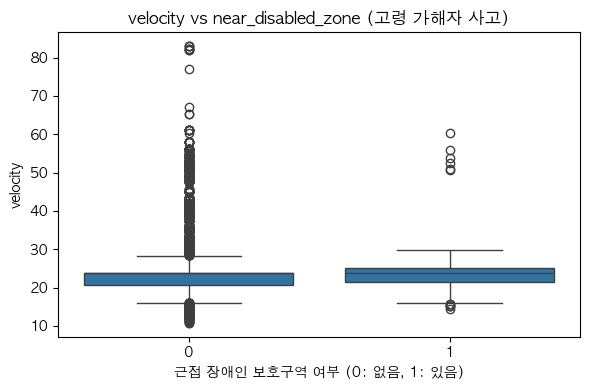

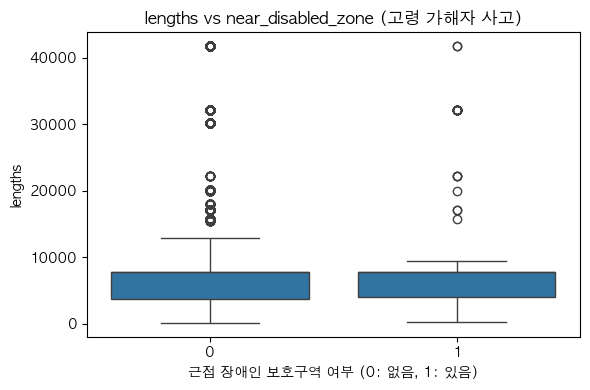

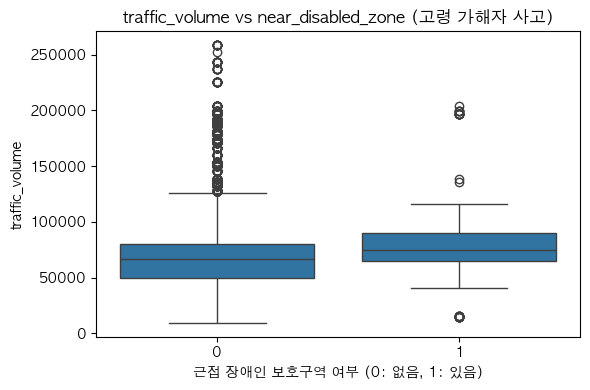

In [150]:
# 도로 환경 요약 (근접 장애인 보호구역 중심)
print("\n[근접 장애인 보호구역 여부에 따른 평균값 비교 - 고령 가해자]")
print(df_elderly_driver.groupby('near_disabled_zone')[['velocity', 'lengths', 'traffic_volume']].mean().round(2))

for col in ['road_div', 'rdse_sttus_dc']:
    print(f"\n[{col} 비율 (%)]")
    print(pd.crosstab(df_elderly_driver['near_disabled_zone'], df_elderly_driver[col], normalize='index').round(2) * 100)

#  9. 박스플롯 시각화
for col in ['velocity', 'lengths', 'traffic_volume']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_elderly_driver, x='near_disabled_zone', y=col)
    plt.title(f"{col} vs near_disabled_zone (고령 가해자 사고)")
    plt.xlabel("근접 장애인 보호구역 여부 (0: 없음, 1: 있음)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
#횡단보도 있는 구간은 차량 속도도 낮고 도로도 더 짧고, 교통량도 적다.
# 보행자 보호 환경, 복잡한 도로 구간에서 사고가 더 많이 발생하는 경향이 있다.
#고령자 입장에서 더 위험할 수 있는 구조이다.


[근접 장애인 보호구역 여부에 따른 평균값 비교 - 고령 가해자]
                    velocity  lengths  traffic_volume
near_disabled_zone                                   
0                      23.47  7605.53        70062.52
1                      24.01  9153.91        81146.10

[road_div 비율 (%)]
road_div              0    1    2     3    4    5    6     7
near_disabled_zone                                          
0                   0.0  5.0  9.0  73.0  0.0  0.0  1.0  12.0
1                   2.0  4.0  2.0  84.0  1.0  0.0  0.0   7.0

[rdse_sttus_dc 비율 (%)]
rdse_sttus_dc          0    1    2    3    4    5    6
near_disabled_zone                                    
0                   91.0  2.0  0.0  0.0  7.0  0.0  0.0
1                   92.0  2.0  1.0  0.0  5.0  0.0  0.0


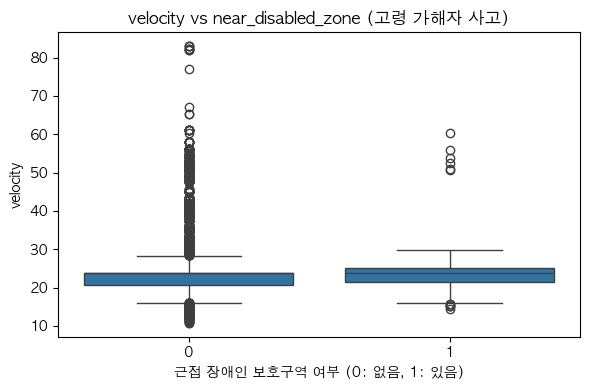

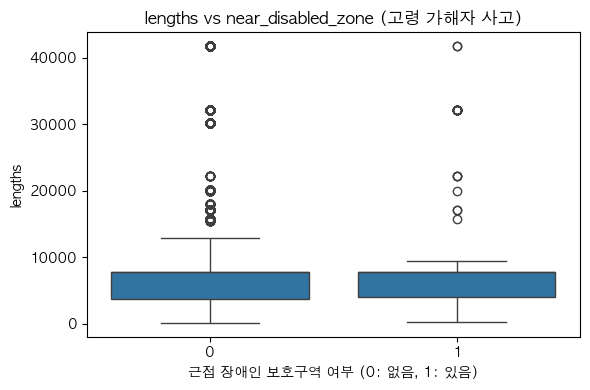

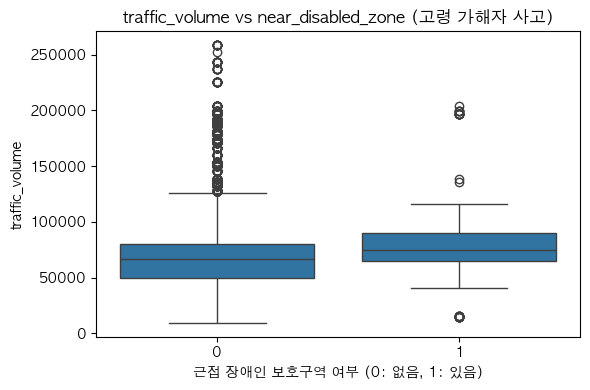

In [151]:
# 도로 환경 요약 (근접 장애인 보호구역 중심)
print("\n[근접 장애인 보호구역 여부에 따른 평균값 비교 - 고령 가해자]")
print(df_elderly_driver.groupby('near_disabled_zone')[['velocity', 'lengths', 'traffic_volume']].mean().round(2))

for col in ['road_div', 'rdse_sttus_dc']:
    print(f"\n[{col} 비율 (%)]")
    print(pd.crosstab(df_elderly_driver['near_disabled_zone'], df_elderly_driver[col], normalize='index').round(2) * 100)

#  9. 박스플롯 시각화
for col in ['velocity', 'lengths', 'traffic_volume']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_elderly_driver, x='near_disabled_zone', y=col)
    plt.title(f"{col} vs near_disabled_zone (고령 가해자 사고)")
    plt.xlabel("근접 장애인 보호구역 여부 (0: 없음, 1: 있음)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
#장애인 보호구역 있는 구간은 평균속도 낮고, 도로길이 낮고, 차량통행량 낮아진다..
#신호제어가 있는 도심 밀집지역, 교차로 근처, 단거리 주행 구간일 가능성 높음
#고령자 입장에서 복잡하고 판단 요구 높은 환경임


[근접 장애인 보호구역 여부에 따른 평균값 비교 - 고령 가해자]
                    velocity  lengths  traffic_volume
near_disabled_zone                                   
0                      23.47  7605.53        70062.52
1                      24.01  9153.91        81146.10

[road_div 비율 (%)]
road_div              0    1    2     3    4    5    6     7
near_disabled_zone                                          
0                   0.0  5.0  9.0  73.0  0.0  0.0  1.0  12.0
1                   2.0  4.0  2.0  84.0  1.0  0.0  0.0   7.0

[rdse_sttus_dc 비율 (%)]
rdse_sttus_dc          0    1    2    3    4    5    6
near_disabled_zone                                    
0                   91.0  2.0  0.0  0.0  7.0  0.0  0.0
1                   92.0  2.0  1.0  0.0  5.0  0.0  0.0


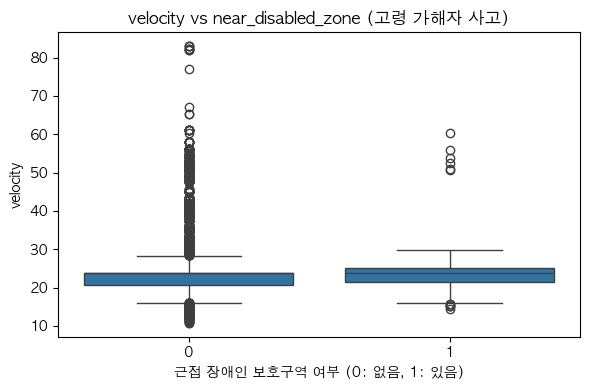

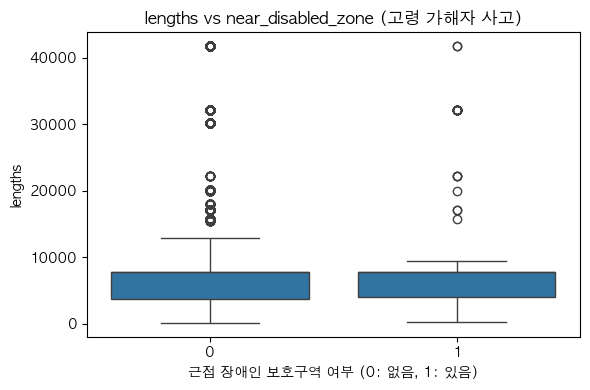

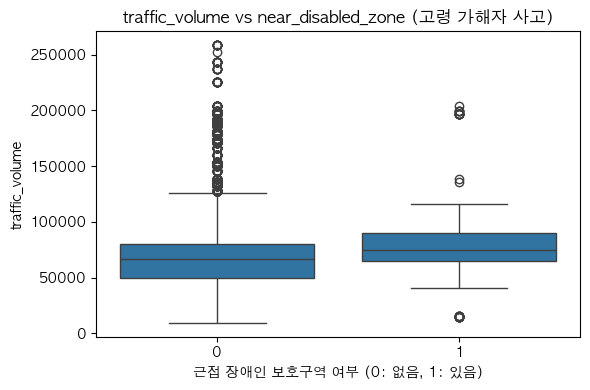

In [152]:
# 도로 환경 요약 (근접 장애인 보호구역 중심)
print("\n[근접 장애인 보호구역 여부에 따른 평균값 비교 - 고령 가해자]")
print(df_elderly_driver.groupby('near_disabled_zone')[['velocity', 'lengths', 'traffic_volume']].mean().round(2))

for col in ['road_div', 'rdse_sttus_dc']:
    print(f"\n[{col} 비율 (%)]")
    print(pd.crosstab(df_elderly_driver['near_disabled_zone'], df_elderly_driver[col], normalize='index').round(2) * 100)

#  9. 박스플롯 시각화
for col in ['velocity', 'lengths', 'traffic_volume']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_elderly_driver, x='near_disabled_zone', y=col)
    plt.title(f"{col} vs near_disabled_zone (고령 가해자 사고)")
    plt.xlabel("근접 장애인 보호구역 여부 (0: 없음, 1: 있음)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
#장애인 보호구역 있는 구간은 속도 낮고, 도로 짧고, 통행량 낮음
#보행자 중심 지역 특성이 반영된 환경 -> 고령 운전자가 속도 감속 등 대응이 필요한 위험구간 
#장애인 보호구역은 주로 보조도로에(생활도로)에 위치 -> 보행자와의 마찰 위험 높음 
#판단 실수나 브레이크 대응 미흡으로 사고 발생 가능성 있음 


[근접 장애인 보호구역 여부에 따른 평균값 비교 - 고령 가해자]
                    velocity  lengths  traffic_volume
near_disabled_zone                                   
0                      23.47  7605.53        70062.52
1                      24.01  9153.91        81146.10

[road_div 비율 (%)]
road_div              0    1    2     3    4    5    6     7
near_disabled_zone                                          
0                   0.0  5.0  9.0  73.0  0.0  0.0  1.0  12.0
1                   2.0  4.0  2.0  84.0  1.0  0.0  0.0   7.0

[rdse_sttus_dc 비율 (%)]
rdse_sttus_dc          0    1    2    3    4    5    6
near_disabled_zone                                    
0                   91.0  2.0  0.0  0.0  7.0  0.0  0.0
1                   92.0  2.0  1.0  0.0  5.0  0.0  0.0


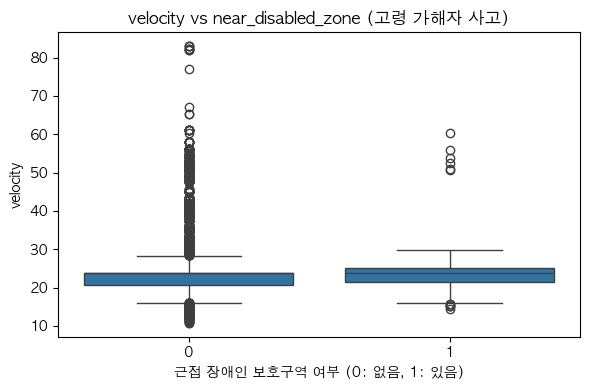

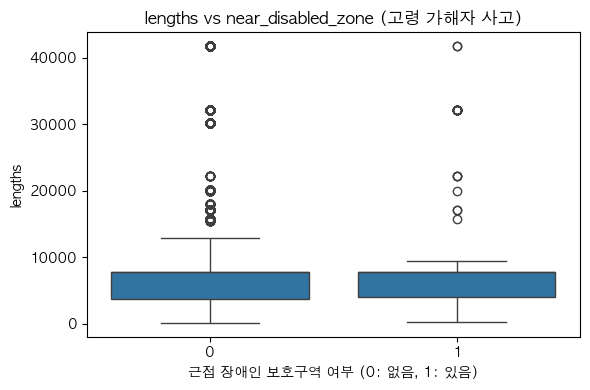

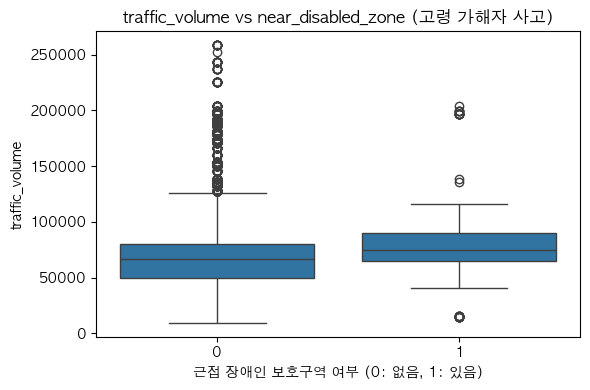

In [203]:
# 도로 환경 요약 (근접 장애인 보호구역 중심)
print("\n[근접 장애인 보호구역 여부에 따른 평균값 비교 - 고령 가해자]")
print(df_elderly_driver.groupby('near_disabled_zone')[['velocity', 'lengths', 'traffic_volume']].mean().round(2))

for col in ['road_div', 'rdse_sttus_dc']:
    print(f"\n[{col} 비율 (%)]")
    print(pd.crosstab(df_elderly_driver['near_disabled_zone'], df_elderly_driver[col], normalize='index').round(2) * 100)

#  9. 박스플롯 시각화
for col in ['velocity', 'lengths', 'traffic_volume']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_elderly_driver, x='near_disabled_zone', y=col)
    plt.title(f"{col} vs near_disabled_zone (고령 가해자 사고)")
    plt.xlabel("근접 장애인 보호구역 여부 (0: 없음, 1: 있음)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
#장애인 보호구역 있는 구간은 속도 낮고, 도로 짧고, 통행량 낮음
#보행자 중심 지역 특성이 반영된 환경 -> 고령 운전자가 속도 감속 등 대응이 필요한 위험구간 
#장애인 보호구역은 주로 보조도로에(생활도로)에 위치 -> 보행자와의 마찰 위험 높음 
#판단 실수나 브레이크 대응 미흡으로 사고 발생 가능성 있음 


[근접 장애인 보호구역 여부에 따른 평균값 비교 - 고령 가해자]
                    velocity  lengths  traffic_volume
near_disabled_zone                                   
0                      23.47  7605.53        70062.52
1                      24.01  9153.91        81146.10

[road_div 비율 (%)]
road_div              0    1    2     3    4    5    6     7
near_disabled_zone                                          
0                   0.0  5.0  9.0  73.0  0.0  0.0  1.0  12.0
1                   2.0  4.0  2.0  84.0  1.0  0.0  0.0   7.0

[rdse_sttus_dc 비율 (%)]
rdse_sttus_dc          0    1    2    3    4    5    6
near_disabled_zone                                    
0                   91.0  2.0  0.0  0.0  7.0  0.0  0.0
1                   92.0  2.0  1.0  0.0  5.0  0.0  0.0


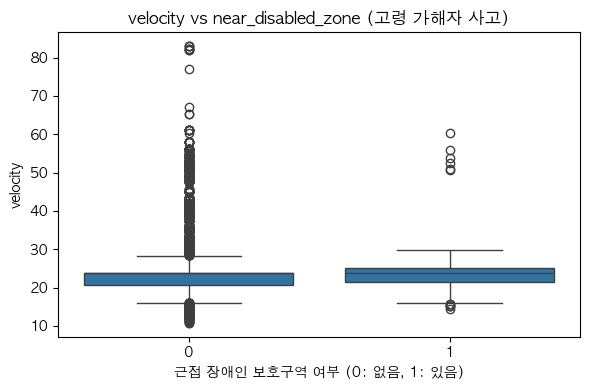

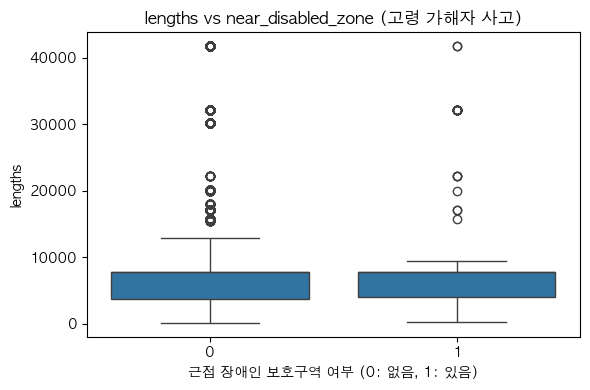

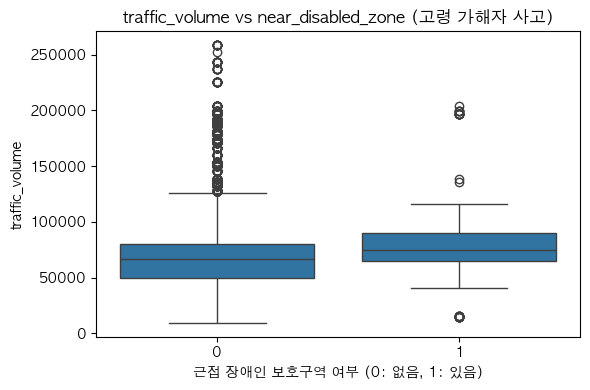

In [154]:
# 도로 환경 요약 (근접 장애인 보호구역 중심)
print("\n[근접 장애인 보호구역 여부에 따른 평균값 비교 - 고령 가해자]")
print(df_elderly_driver.groupby('near_disabled_zone')[['velocity', 'lengths', 'traffic_volume']].mean().round(2))

for col in ['road_div', 'rdse_sttus_dc']:
    print(f"\n[{col} 비율 (%)]")
    print(pd.crosstab(df_elderly_driver['near_disabled_zone'], df_elderly_driver[col], normalize='index').round(2) * 100)

#  9. 박스플롯 시각화
for col in ['velocity', 'lengths', 'traffic_volume']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_elderly_driver, x='near_disabled_zone', y=col)
    plt.title(f"{col} vs near_disabled_zone (고령 가해자 사고)")
    plt.xlabel("근접 장애인 보호구역 여부 (0: 없음, 1: 있음)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
#장애인 보호구역 있는 구간은 속도, 도로 길이, 통행량이 모두 높게 나왔다. 또한 주도로 비율이 높다.
#다른 보호구역과 달리 장애인 보호 구역이 대규모 공공시설 근처의 간선도로, 병원/복지기관 . 앞대로변에 설치 될 가능성 보여줌
#보호구역임에도 불구하고 물리적 교통 환경이 고령자에게 위험할 수 있는 구조임 

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78     15073
           1       0.19      0.27      0.22      3442

    accuracy                           0.65     18515
   macro avg       0.50      0.51      0.50     18515
weighted avg       0.70      0.65      0.67     18515

              precision    recall  f1-score   support

           0       0.93      0.81      0.86     60274
           1       0.47      0.74      0.57     13784

    accuracy                           0.79     74058
   macro avg       0.70      0.77      0.72     74058
weighted avg       0.85      0.79      0.81     74058



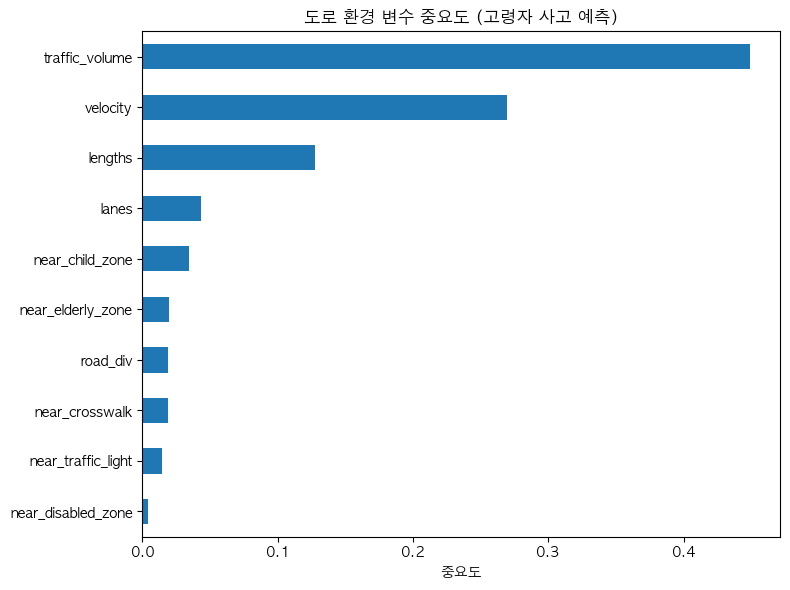

In [210]:

# 1. 데이터 불러오기
df = pd.read_csv("./data/processed/accident_data_cleaned.csv")

# 2. 고령자 사고 여부 생성
df["acdnt_age_1_code"] = pd.to_numeric(df["acdnt_age_1_code"], errors="coerce")
df = df[df["acdnt_age_1_code"].notna()]
df["is_elderly_accident"] = df["acdnt_age_1_code"].apply(lambda x: 1 if x >= 65 else 0)

# 3. 변수 선택
road_features = [
    'road_div', 'lengths', 'lanes', 'velocity', 'traffic_volume',
    'near_crosswalk', 'near_traffic_light', 'near_child_zone',
    'near_elderly_zone', 'near_disabled_zone'
]

X = df[road_features].copy()
y = df["is_elderly_accident"]

# 인코딩 & 결측치 처리
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])
X = X.fillna(X.mean())

# 4. 모델 학습
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=150, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

#평가
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(classification_report(y_train, model.predict(X_train)))

# 5. 변수 중요도 시각화
importances = pd.Series(model.feature_importances_, index=road_features).sort_values()
plt.figure(figsize=(8, 6))
importances.plot(kind='barh')
plt.title("도로 환경 변수 중요도 (고령자 사고 예측)")
plt.xlabel("중요도")
plt.tight_layout()
plt.show()


   도로유형  전체사고수  고령자사고수    고령자사고율  고령자사고율(%)
0     0    485      70  0.144330      14.43
1     1   5241     802  0.153024      15.30
2     2   8327    1562  0.187583      18.76
3     3  65754   12511  0.190270      19.03
4     4    184      55  0.298913      29.89
5     5    175      24  0.137143      13.71
6     6   1075     211  0.196279      19.63
7     7  11332    1991  0.175697      17.57


/var/folders/0w/lqjy7dfj729d1lm1ynczx3nw0000gn/T/ipykernel_55576/1876071687.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=road_div_stats, x="도로유형", y="고령자사고율(%)", palette="Blues_d")


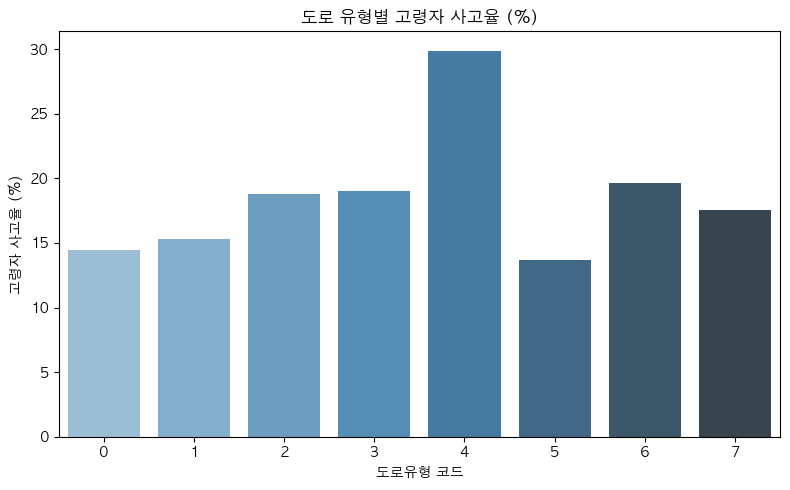

In [156]:
df["acdnt_age_1_code"] = pd.to_numeric(df["acdnt_age_1_code"], errors="coerce")
df = df[df["acdnt_age_1_code"].notna()]
df["is_elderly_accident"] = df["acdnt_age_1_code"].apply(lambda x: 1 if x >= 65 else 0)

# 도로 유형별 전체 사고 대비 고령자 사고 비율
road_div_stats = df.groupby("road_div")["is_elderly_accident"].agg(['count', 'sum', 'mean']).reset_index()
road_div_stats.columns = ["도로유형", "전체사고수", "고령자사고수", "고령자사고율"]
road_div_stats["고령자사고율(%)"] = (road_div_stats["고령자사고율"] * 100).round(2)
print(road_div_stats)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=road_div_stats, x="도로유형", y="고령자사고율(%)", palette="Blues_d")
plt.title("도로 유형별 고령자 사고율 (%)")
plt.xlabel("도로유형 코드")
plt.ylabel("고령자 사고율 (%)")
plt.tight_layout()
plt.show()

In [213]:
print(X_train.columns)

Index(['road_div', 'lengths', 'lanes', 'velocity', 'traffic_volume',
       'near_crosswalk', 'near_traffic_light', 'near_child_zone',
       'near_elderly_zone', 'near_disabled_zone'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# 1. 교통량 구간화 먼저 하고
X['traffic_volume_bin'] = pd.qcut(X['traffic_volume'], q=4, labels=['낮음', '중간', '높음', '매우높음'])
X['traffic_volume_bin'] = le.fit_transform(X['traffic_volume_bin'])
# 2. 그 다음 train/test split 다시!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. 모델 다시 학습
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

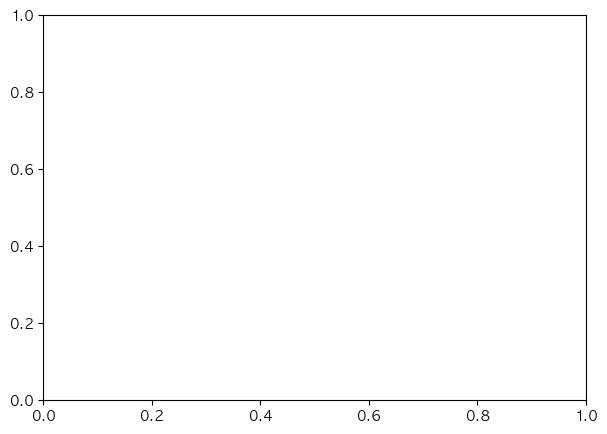

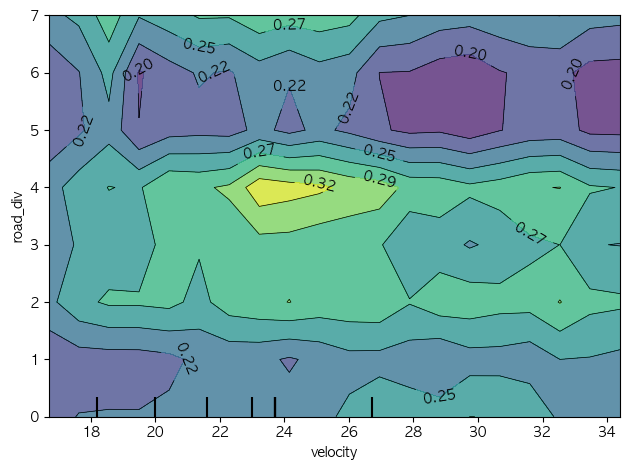

In [214]:
#도로형태별 속도 변화에 따른 위험도
fig, ax = plt.subplots(figsize=(7, 5))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    [('velocity', 'road_div')], 
    kind='average',
    grid_resolution=20
)
plt.tight_layout()
plt.show()

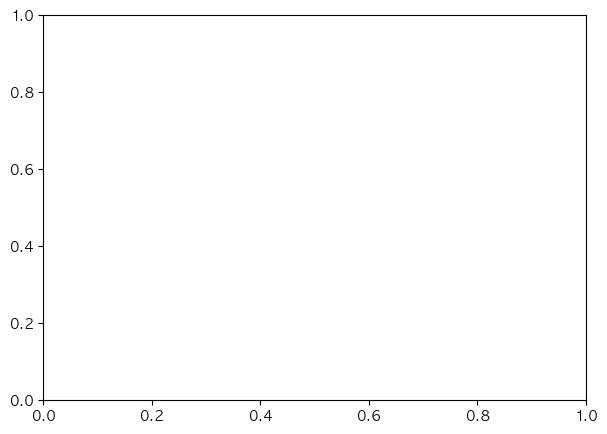

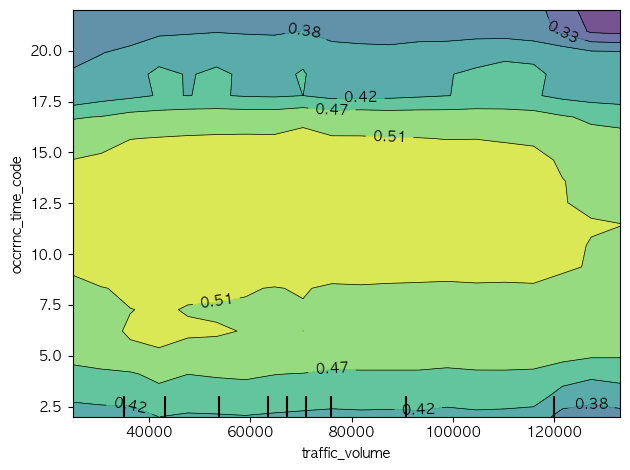

In [ ]:
#시간대별 혼잡도로 인한 사고 예측 차이
fig, ax = plt.subplots(figsize=(7, 5))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    [('traffic_volume', 'occrrnc_time_code')], 
    kind='average',
    grid_resolution=20
)
plt.tight_layout()
plt.show()

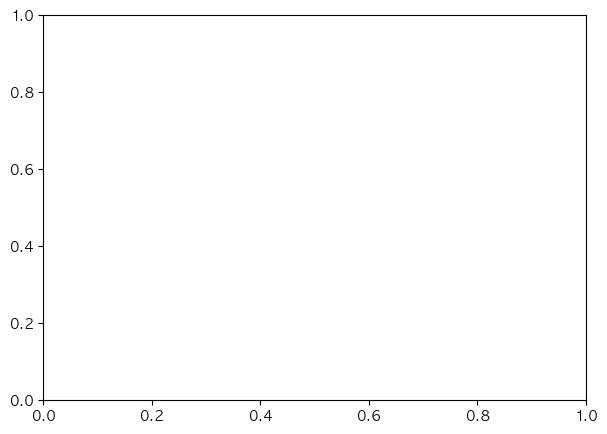

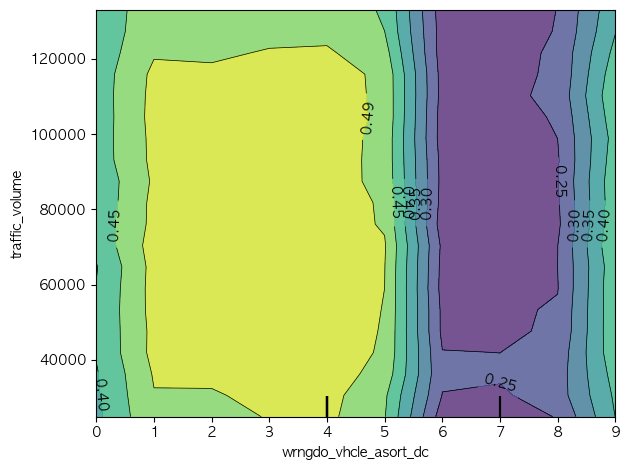

In [ ]:
#가해차량 유형별 혼잡 구간의 사고 영향 차이
fig, ax = plt.subplots(figsize=(7, 5))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    [('wrngdo_vhcle_asort_dc', 'traffic_volume')], 
    kind='average',
    grid_resolution=20
)
plt.tight_layout()
plt.show()

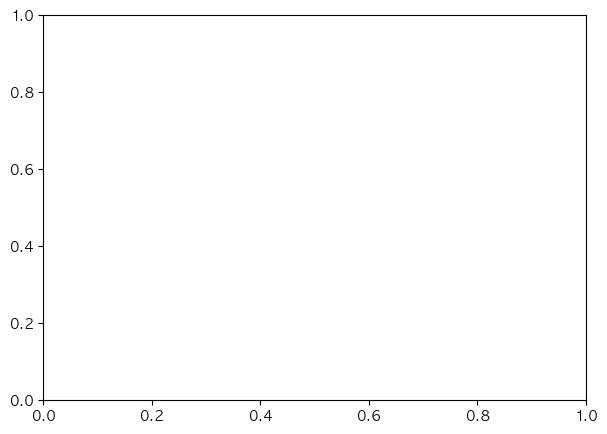

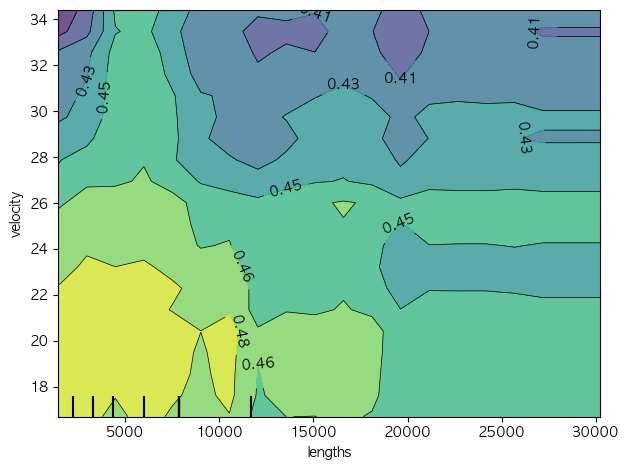

In [ ]:
#도로 길이와 속도 조합 → 장거리 고속 위험구간 여부
fig, ax = plt.subplots(figsize=(7, 5))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    [('lengths', 'velocity')], 
    kind='average',
    grid_resolution=20
)
plt.tight_layout()
plt.show()

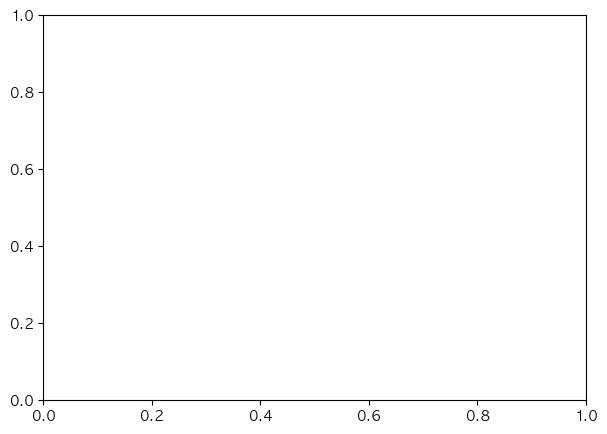

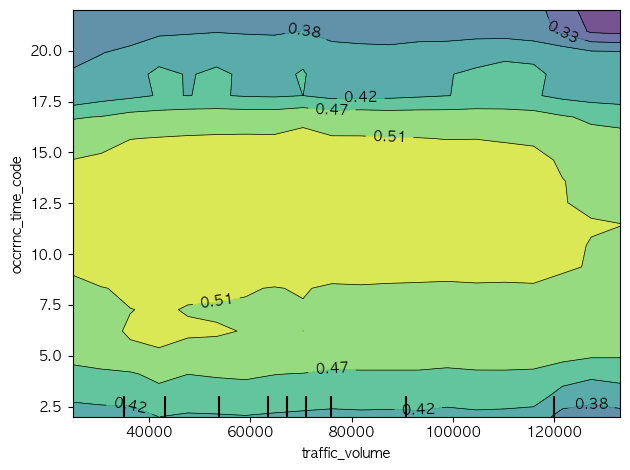

In [ ]:
#시간대별 혼잡도로 인한 사고 예측 차이
fig, ax = plt.subplots(figsize=(7, 5))
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    [('traffic_volume', 'occrrnc_time_code')], 
    kind='average',
    grid_resolution=20
)
plt.tight_layout()
plt.show()

Before SMOTE: {0: 60277, 1: 13781}
After SMOTE : {0: 60277, 1: 60277}

📊 XGBoost + SMOTE 테스트셋 성능:
              precision    recall  f1-score   support

           0       0.81      0.64      0.72     15070
           1       0.18      0.35      0.24      3445

    accuracy                           0.59     18515
   macro avg       0.50      0.49      0.48     18515
weighted avg       0.69      0.59      0.63     18515

              precision    recall  f1-score   support

           0       0.82      0.65      0.73     60277
           1       0.20      0.40      0.27     13781

    accuracy                           0.60     74058
   macro avg       0.51      0.52      0.50     74058
weighted avg       0.71      0.60      0.64     74058



/Users/leejuan/Documents/GitHub/senior-road-risk-analyzer/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [11:38:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 1000x600 with 0 Axes>

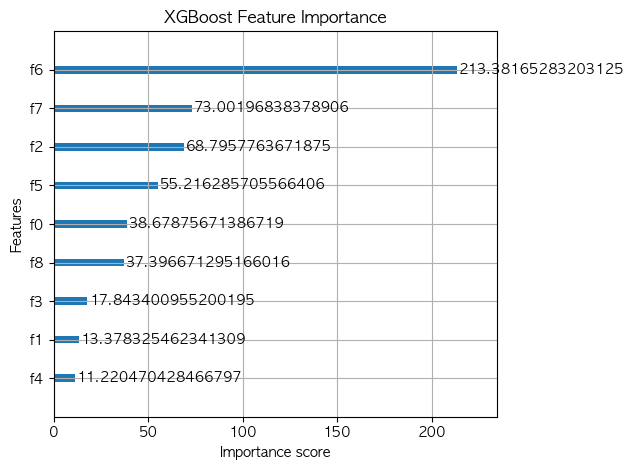

In [196]:
# 필수 라이브러리 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
# ✅ 0. 중복 컬럼 제거 (맨 위에 딱 한 줄 추가)
X = X.loc[:, ~X.columns.duplicated()]
# 🚨 데이터 준비: X, y는 미리 전처리된 상태라고 가정
# 예: 범주형 인코딩 완료, 자전거 제외, 변수 선택 완료

# 1. 학습/테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. SMOTE로 소수 클래스 오버샘플링
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE :", pd.Series(y_train_resampled).value_counts().to_dict())

# 3. XGBoost 모델 정의
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=1,  # SMOTE 적용했으므로 따로 안줘도 됨
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 4. 학습 (넘파이 배열로 변환해 pandas dtype 오류 방지)
xgb_model.fit(X_train_resampled.values, y_train_resampled)

# 5. 예측 및 평가 (역시 넘파이 변환)
y_pred = xgb_model.predict(X_test.values)

# 6. 성능 확인
print("\n📊 XGBoost + SMOTE 테스트셋 성능:")
print(classification_report(y_test, y_pred))
print(classification_report(y_train, xgb_model.predict(X_train.values)))
from xgboost import plot_importance  # 꼭 필요!

# 변수 중요도 시각화
import matplotlib.pyplot as plt
#시각화
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')  # gain 기준 상위 10개
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

위 모델은 고령자사고 예측 신호등이 있는지 없는지가 가장 큰 영향을 준다고 판단함 

In [197]:
X_train.columns.tolist()

['road_div',
 'lengths',
 'lanes',
 'velocity',
 'traffic_volume',
 'near_crosswalk',
 'near_traffic_light',
 'near_child_zone',
 'near_disabled_zone']

/var/folders/0w/lqjy7dfj729d1lm1ynczx3nw0000gn/T/ipykernel_55576/2461602475.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/leejuan/Documents/GitHub/senior-road-risk-analyzer/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


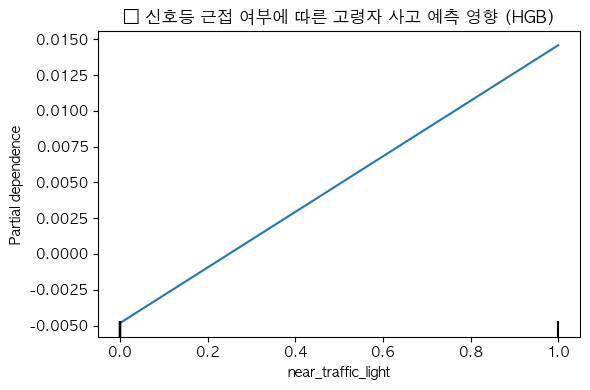

In [202]:
from sklearn.ensemble import HistGradientBoostingClassifier

# XGBoost 대신 호환 잘 되는 모델로 대체 (PDP용)
model_pdp = HistGradientBoostingClassifier(random_state=42)
model_pdp.fit(X_train, y_train)

# PDP 시각화
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
PartialDependenceDisplay.from_estimator(
    model_pdp,
    X_test,
    features=['near_traffic_light'],
    kind='average',
    ax=ax
)
plt.title("📈 신호등 근접 여부에 따른 고령자 사고 예측 영향 (HGB)")
plt.tight_layout()
plt.show()